51
100
105
256


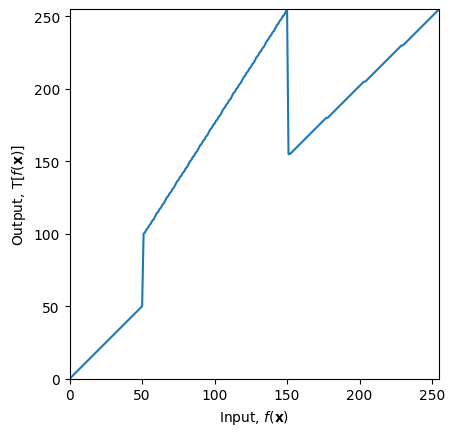

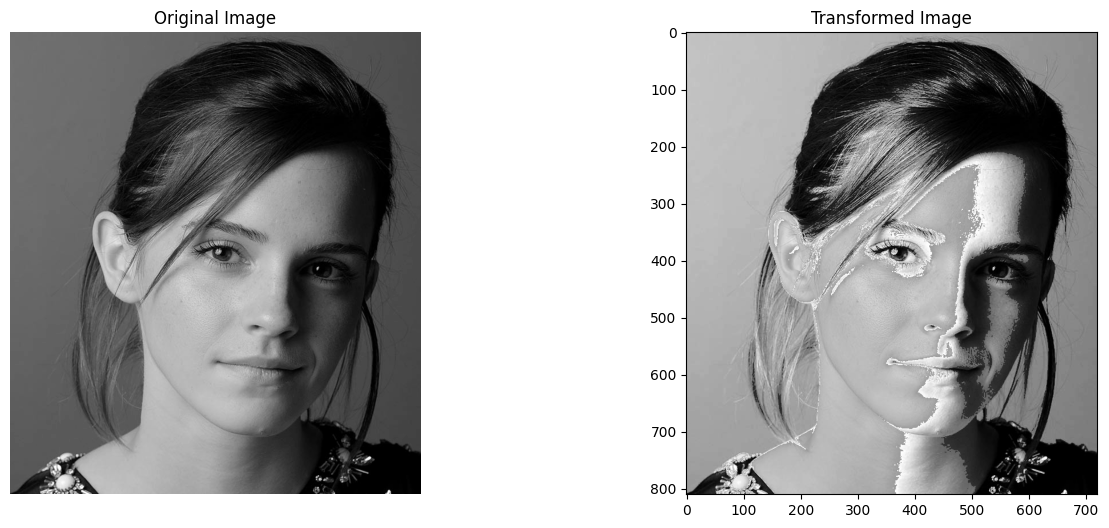

In [3]:
# Intensity Windowing
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


t1 = np.linspace(0, 50, 51).astype('uint8')
print(len(t1))
t2 = np.linspace(100, 255, 100).astype('uint8')
print(len(t2))
t3 = np.linspace(155, 255, 105).astype('uint8')
print(len(t3)) 
 
transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal') 
plt.show()


f = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
t = np.arange(256, dtype=np.uint8)
g = transform[f]
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
for a in ax[0:1]:
    a.axis('off')

plt.show()

181
75
256
181
75
75
256


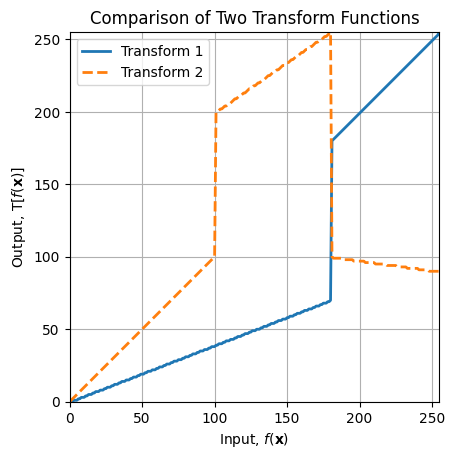

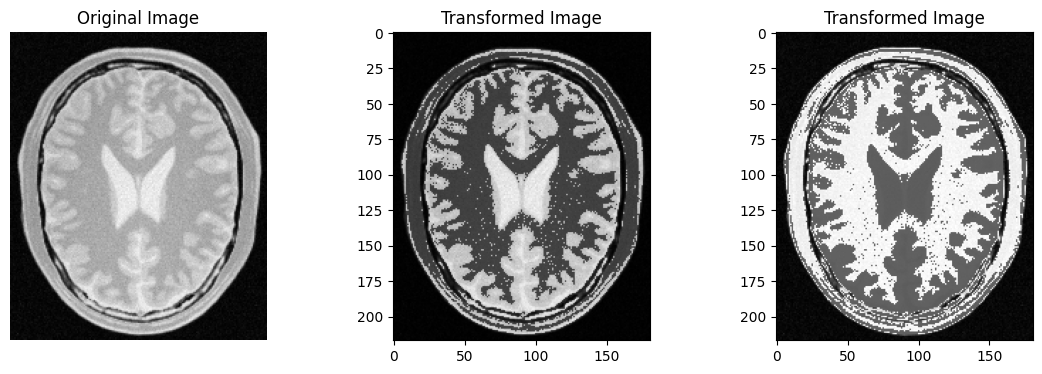

In [4]:
t1 = np.linspace(0, 70, 181).astype('uint8')
print(len(t1))
t2 = np.linspace(180, 255, 75).astype('uint8')
print(len(t2))
 
transform1 = np.concatenate((t1, t2), axis=0).astype('uint8')
print(len(transform1))

t3 = np.linspace(0, 100, 101).astype('uint8')
print(len(t1))
t4 = np.linspace(200, 255, 80).astype('uint8')
print(len(t2))
t5 = np.linspace(100, 90, 75).astype('uint8')
print(len(t2))

 
transform2 = np.concatenate((t3, t4, t5), axis=0).astype('uint8')
print(len(transform2))

fig, ax = plt.subplots()
ax.plot(np.arange(256), transform1, label='Transform 1', linestyle='-', linewidth=2)
ax.plot(np.arange(256), transform2, label='Transform 2', linestyle='--', linewidth=2)

ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
ax.legend()
plt.grid(True)
plt.title("Comparison of Two Transform Functions")
plt.show()


f = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
t = np.arange(256, dtype=np.uint8)
g1 = transform1[f]
g2 = transform2[f]
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(g1, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
ax[2].imshow(g2, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Transformed Image')
for a in ax[0:1]:
    a.axis('off')

plt.show()

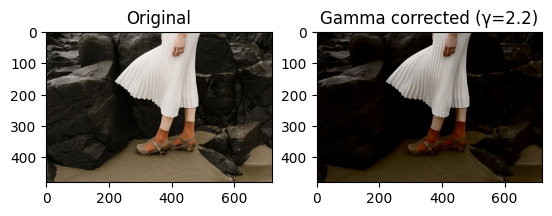

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load image
f = cv.imread('a1images/highlights_and_shadows.jpg')  # BGR image
lab = cv.cvtColor(f, cv.COLOR_BGR2LAB)
L, a, b = cv.split(lab)

# Normalize L to [0,1], apply gamma, then rescale back to [0,255]
L_float = L / 255.0
gamma = 2.2
L_corrected = np.power(L_float, gamma)
L_corrected = np.uint8(np.clip(L_corrected * 255.0, 0, 255))

# Merge and convert back to BGR
lab_corrected = cv.merge((L_corrected, a, b))
img_corrected = cv.cvtColor(lab_corrected, cv.COLOR_LAB2BGR)

# Show result
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(cv.cvtColor(f, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Gamma corrected (γ=2.2)")
plt.imshow(cv.cvtColor(img_corrected, cv.COLOR_BGR2RGB))
plt.show()


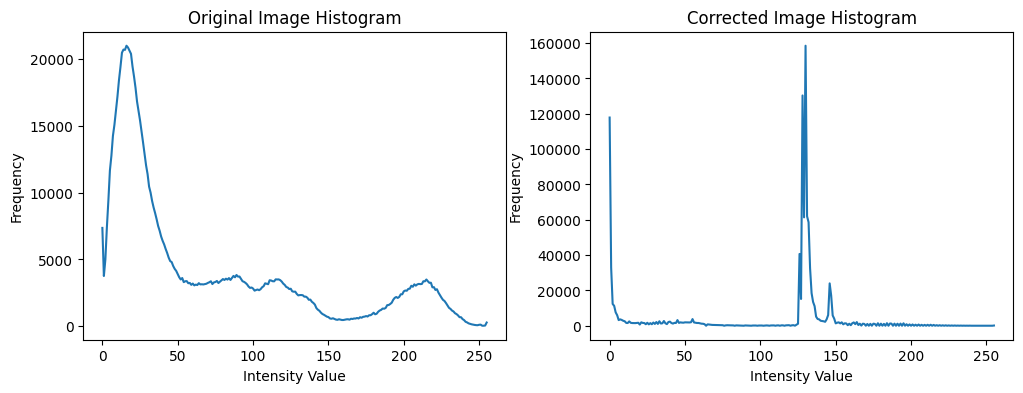

In [6]:
f = cv.cvtColor(f, cv.COLOR_BGR2RGB)
hist, bins = np.histogram(f.ravel(), 256, [0, 256])
hist2, bins2 = np.histogram(lab_corrected.ravel(), 256, [0, 256])
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(hist)
ax[0].set_title('Original Image Histogram')
ax[0].set_xlabel('Intensity Value')
ax[0].set_ylabel('Frequency')
ax[1].plot(hist2)
ax[1].set_title('Corrected Image Histogram')
ax[1].set_xlabel('Intensity Value')
ax[1].set_ylabel('Frequency')
plt.show()



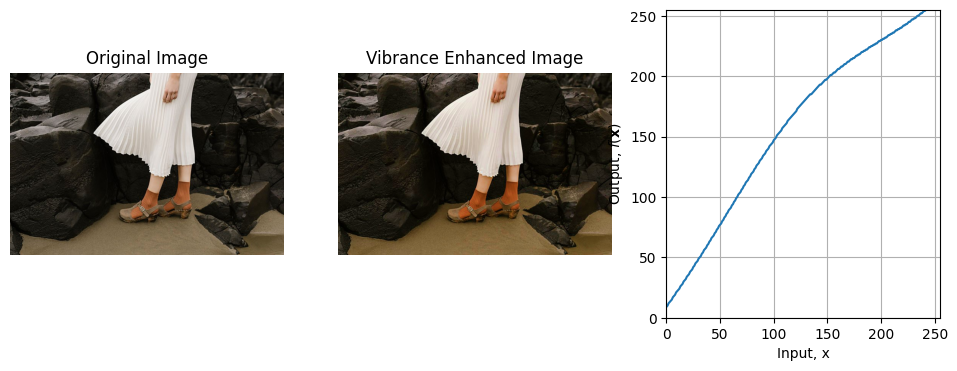

In [21]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read and convert
f = cv.imread('a1images/highlights_and_shadows.jpg')  # BGR image
hsv = cv.cvtColor(f, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv)

# Parameters
a = 0.4   # vibrance amount, in [0,1]
sigma = 70.0

# Transformation on saturation
S_transformed = s.astype(np.float32) + a * 128 * np.exp(-((s.astype(np.float32) - 128)**2) / (2 * sigma**2))
S_transformed = np.clip(S_transformed, 0, 255).astype(np.uint8)

# Merge back into HSV and convert to RGB
hsv[:, :, 1] = S_transformed
g = cv.cvtColor(hsv, cv.COLOR_HSV2RGB)

# Show transformed color image
fig, ax = plt.subplots(1,3, figsize=(12, 4))
ax[0].imshow(cv.cvtColor(f, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(g)
ax[1].set_title('Vibrance Enhanced Image')
ax[1].axis('off')

x_vals = np.arange(256, dtype=np.float32)
transform = x_vals + a * 128 * np.exp(-((x_vals - 128)**2) / (2 * sigma**2))
transform = np.clip(transform, 0, 255).astype(np.uint8)

ax[2].plot(transform)
ax[2].set_xlabel(r'Input, x')
ax[2].set_ylabel(r'Output, $f(\mathbf{x})$')
ax[2].set_xlim(0, 255)
ax[2].set_ylim(0, 255)
plt.grid(True)

plt.show()



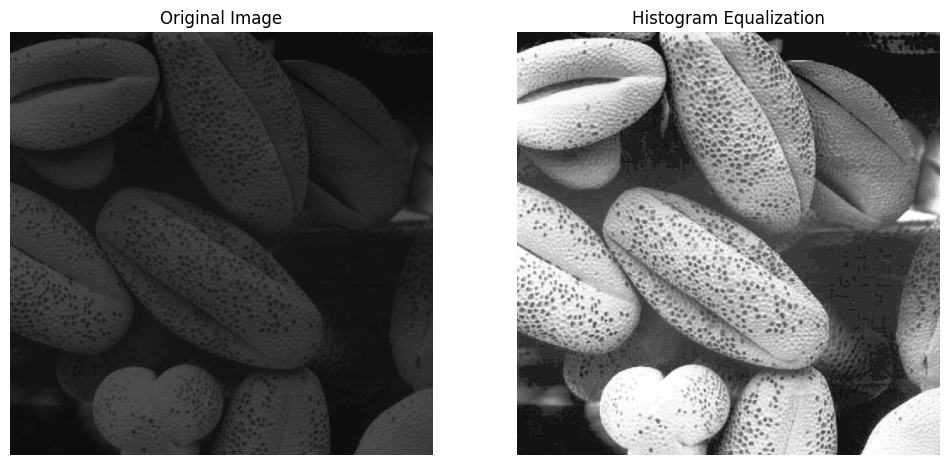

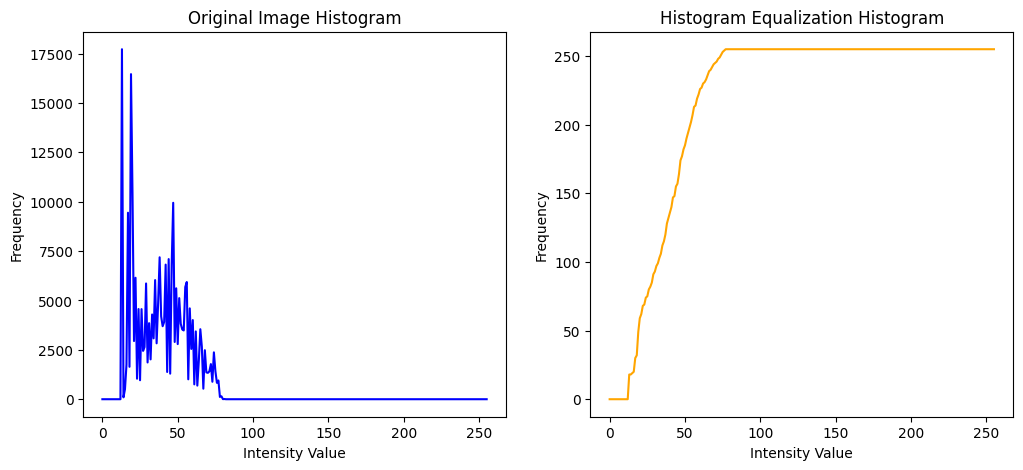

In [30]:
# Do the Same Using a Hand-Computed Intensity Transfromation
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f = cv.imread('a1images/shells.tif', cv.IMREAD_GRAYSCALE)
M, N = f.shape
L = 256
t = np.zeros(256, dtype=np.uint8)
hist, bins = np.histogram(f.ravel(), 256, [0, 256])
cdf = hist.cumsum()
cdf_min = cdf.min()
# Normalize CDF
cdf_normalized = (cdf - cdf_min) / (M*N - cdf_min)
t = np.round(cdf_normalized * (L - 1)).astype(np.uint8)

g = t[f]
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Histogram Equalization')
ax[1].axis('off')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(hist, color='blue')
ax[0].set_title('Original Image Histogram')
ax[0].set_xlabel('Intensity Value')
ax[0].set_ylabel('Frequency')
ax[1].plot(t, color='orange')
ax[1].set_title('Histogram Equalization Histogram')
ax[1].set_xlabel('Intensity Value')
ax[1].set_ylabel('Frequency')
plt.show()

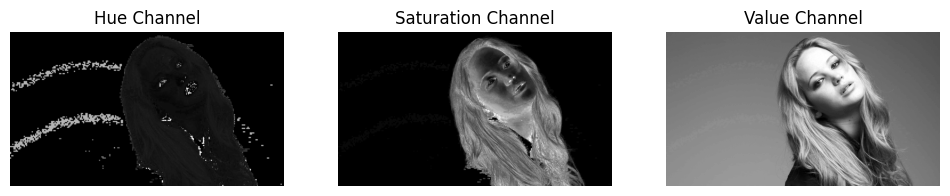

In [31]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f = cv.imread('a1images/jeniffer.jpg')
f = cv.cvtColor(f, cv.COLOR_BGR2HSV)
h, s, v = cv.split(f)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(h, cmap='gray')
ax[0].set_title('Hue Channel')
ax[0].axis('off')

ax[1].imshow(s, cmap='gray')
ax[1].set_title('Saturation Channel')
ax[1].axis('off')

ax[2].imshow(v, cmap='gray')
ax[2].set_title('Value Channel')
ax[2].axis('off')

plt.show()

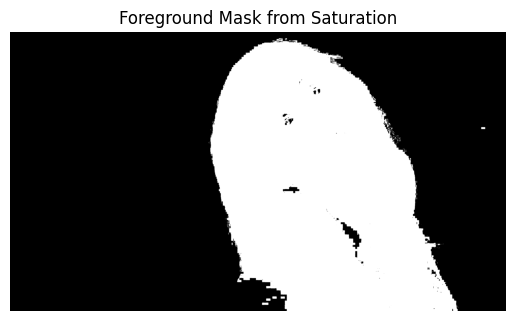

In [48]:
threshold_value = 11
_, foreground_mask = cv.threshold(s, threshold_value, 255, cv.THRESH_BINARY)

# Show the mask
plt.imshow(foreground_mask, cmap='gray')
plt.title('Foreground Mask from Saturation')
plt.axis('off')
plt.show()

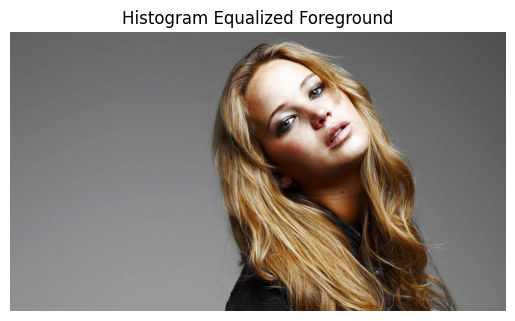

In [49]:

hist_foreground = cv.calcHist([s], [0], foreground_mask, [256], [0, 256])
cdf = hist_foreground.cumsum()

num_foreground_pixels = np.count_nonzero(foreground_mask)
cdf_min = cdf[np.nonzero(cdf)][0]

L = 256
t = np.round((cdf - cdf_min) / (num_foreground_pixels - cdf_min) * (L - 1)).astype(np.uint8)

s_eq = s.copy()
foreground_indices = foreground_mask == 255
s_eq[foreground_indices] = t[s[foreground_indices]]

hsv_eq = cv.merge([h, s_eq, v])
result = cv.cvtColor(hsv_eq, cv.COLOR_HSV2BGR)

plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Histogram Equalized Foreground')
plt.axis('off')
plt.show()

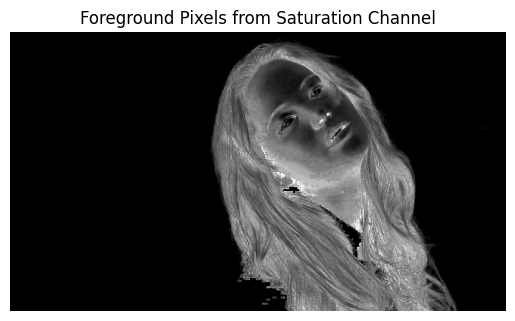

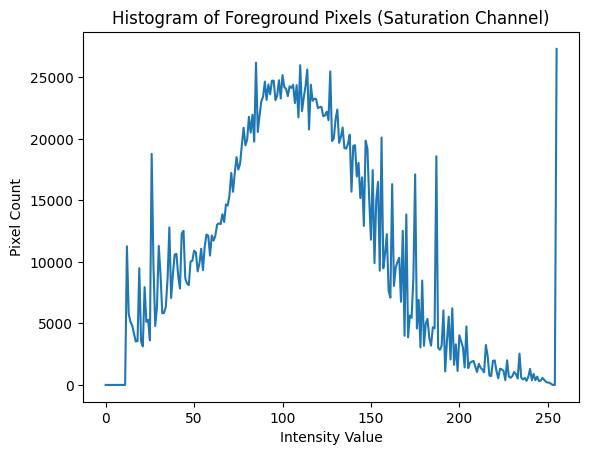

In [40]:
# Extract foreground pixels only
foreground = cv.bitwise_and(s, s, mask=foreground_mask)

# Show the foreground pixels
plt.imshow(foreground, cmap='gray')
plt.title('Foreground Pixels from Saturation Channel')
plt.axis('off')
plt.show()
# Compute histogram of foreground pixels
# Important: Pass the mask to histogram function to count only foreground pixels

hist_foreground = cv.calcHist([s], [0], foreground_mask, [256], [0, 256])


plt.plot(hist_foreground)
plt.title('Histogram of Foreground Pixels (Saturation Channel)')
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')
plt.show()

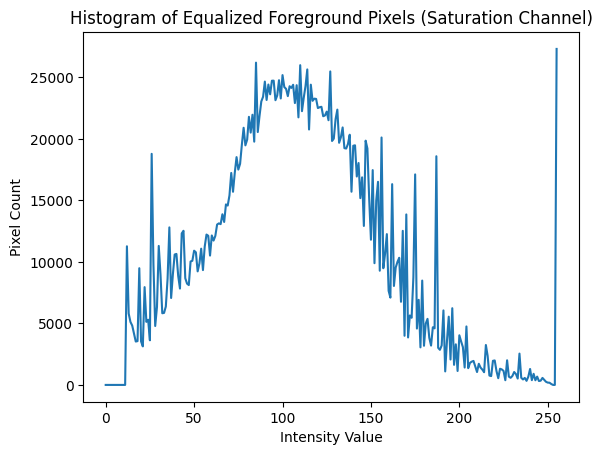

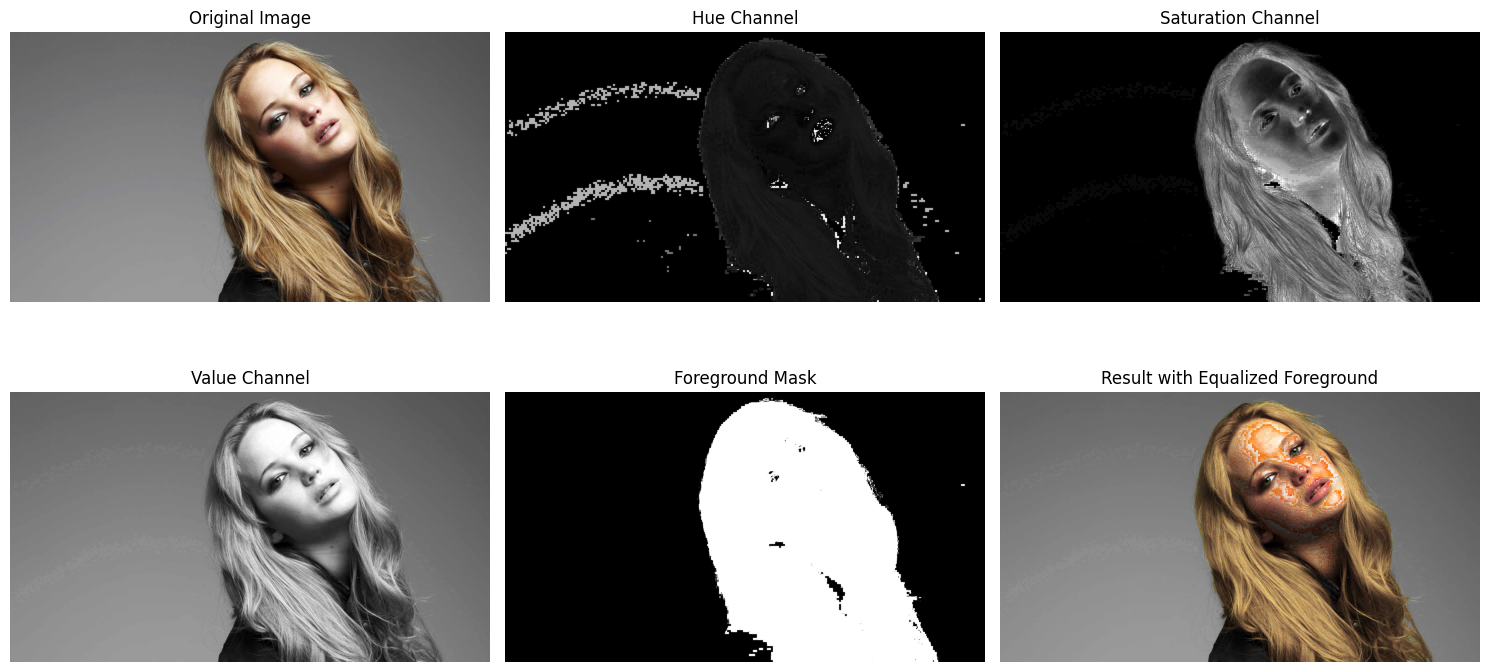

In [ ]:
cdf = hist_foreground.cumsum()
cdf_min = cdf.min()
cdf_max = cdf.max()
t = np.array([(L-1)/(M*N)*cdf[i] for i in range(256)], dtype=np.uint8)

# Apply histogram equalization to the foreground
s_eq = t[foreground]

# Merge equalized S channel back to HSV and convert to BGR
hsv_eq = cv.merge([h, s_eq, v])
result = cv.cvtColor(hsv_eq, cv.COLOR_HSV2BGR)

# Show images and mask
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

axs[0, 0].imshow(cv.cvtColor(f, cv.COLOR_HSV2RGB))
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(h, cmap='gray')
axs[0, 1].set_title('Hue Channel')
axs[0, 1].axis('off')

axs[0, 2].imshow(s, cmap='gray')
axs[0, 2].set_title('Saturation Channel')
axs[0, 2].axis('off')

axs[1, 0].imshow(v, cmap='gray')
axs[1, 0].set_title('Value Channel')
axs[1, 0].axis('off')

axs[1, 1].imshow(foreground_mask, cmap='gray')
axs[1, 1].set_title('Foreground Mask')
axs[1, 1].axis('off')

axs[1, 2].imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
axs[1, 2].set_title('Result with Equalized Foreground')
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

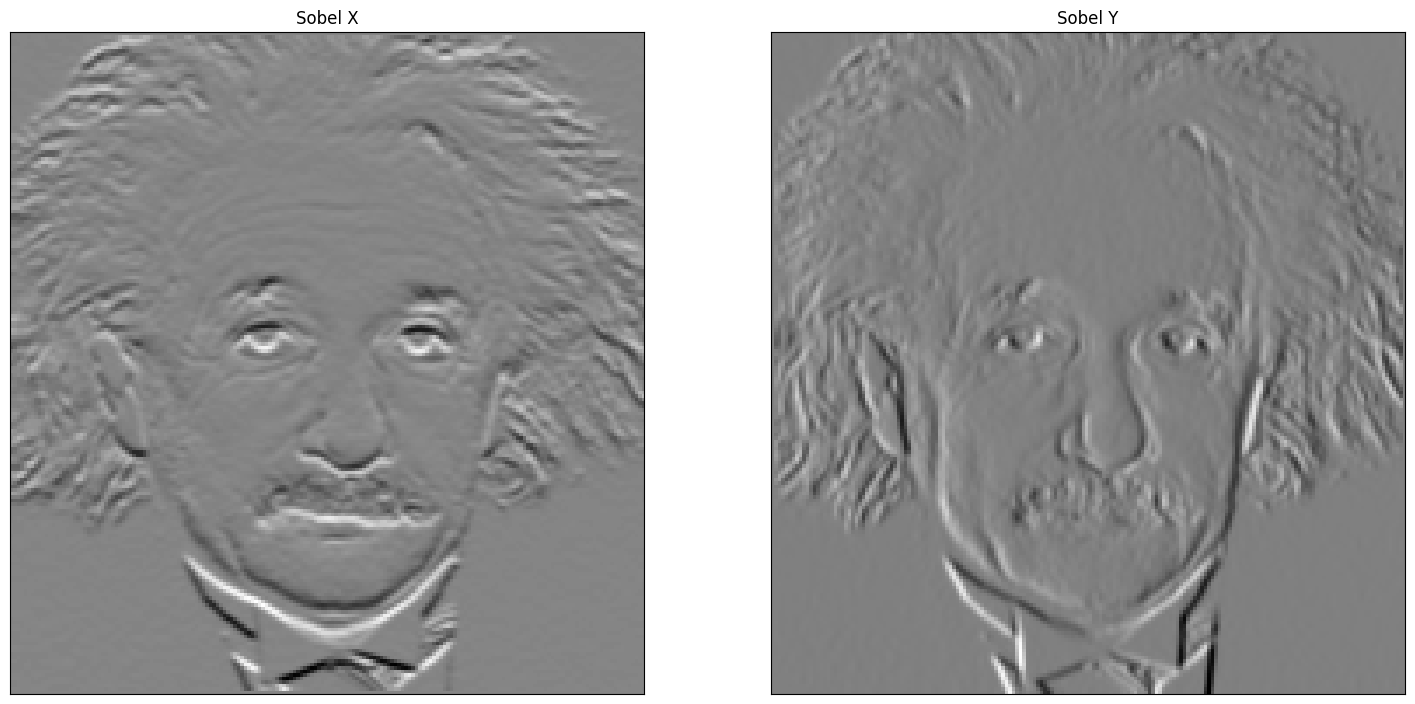

In [50]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

im = cv.imread('a1images/einstein.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None

sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

im_x = cv.filter2D(im, cv.CV_64F, sobel_x)
im_y = cv.filter2D(im, cv.CV_64F, sobel_y)

fig, ax  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,9))
ax[0].imshow(im_x, cmap='gray')
ax[0].set_title('Sobel X')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(im_y, cmap='gray')
ax[1].set_title('Sobel Y')
ax[1].set_xticks([]), ax[1].set_yticks([])
plt.show()


Text(0.5, 1.0, 'Sobel Y')

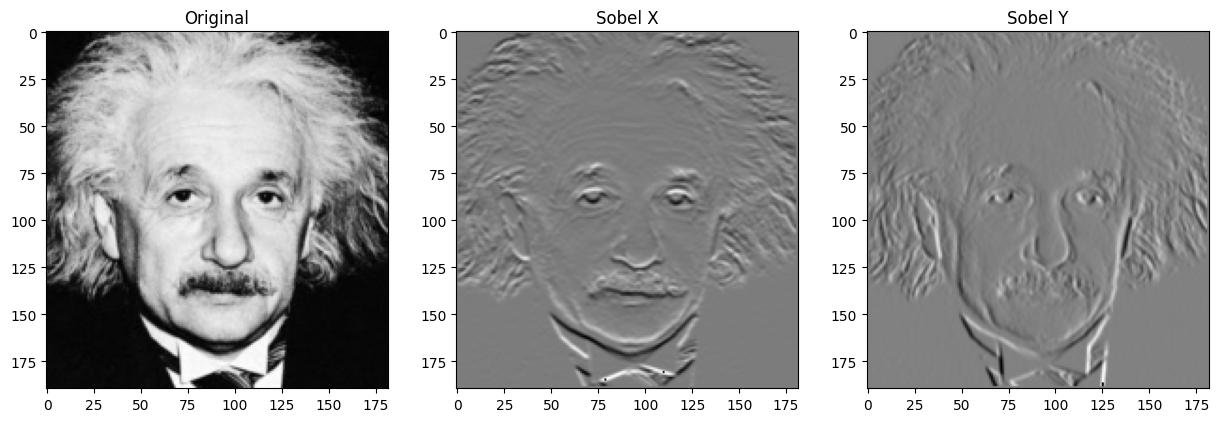

In [57]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math

def filter(image, kernel):
    assert kernel.shape[0] % 2 == 1 and kernel.shape[1] % 2 == 1
    k_hh, k_hw = kernel.shape[0] // 2, kernel.shape[1] // 2
    h, w = image.shape
    result = np.zeros((h, w), dtype=np.float32)

    for m in range(k_hh, h - k_hh):
        for n in range(k_hw, w - k_hw):
            region = image[m-k_hh:m+k_hh+1, n-k_hw:n+k_hw+1]
            result[m, n] = np.sum(region * kernel)

    # rescale to 0–255 for display
    result = cv.normalize(result, None, 0, 255, cv.NORM_MINMAX)
    return result.astype(np.uint8)
    
img = cv.imread('a1images/einstein.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
f, axarr = plt.subplots(1,3, figsize=(15, 8))
axarr[0].imshow(img, cmap="gray")
axarr[0].set_title('Original')
kernel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype='float')
kernel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype='float')
imgx = filter(img, kernel_x)
imgx = imgx*255.0
imgx = imgx.astype(np.uint8)

imgy = filter(img, kernel_y)
imgy = imgy*255.0
imgy = imgy.astype(np.uint8)

axarr[1].imshow(imgx, cmap="gray")
axarr[1].set_title('Sobel X')

axarr[2].imshow(imgy, cmap="gray")
axarr[2].set_title('Sobel Y')


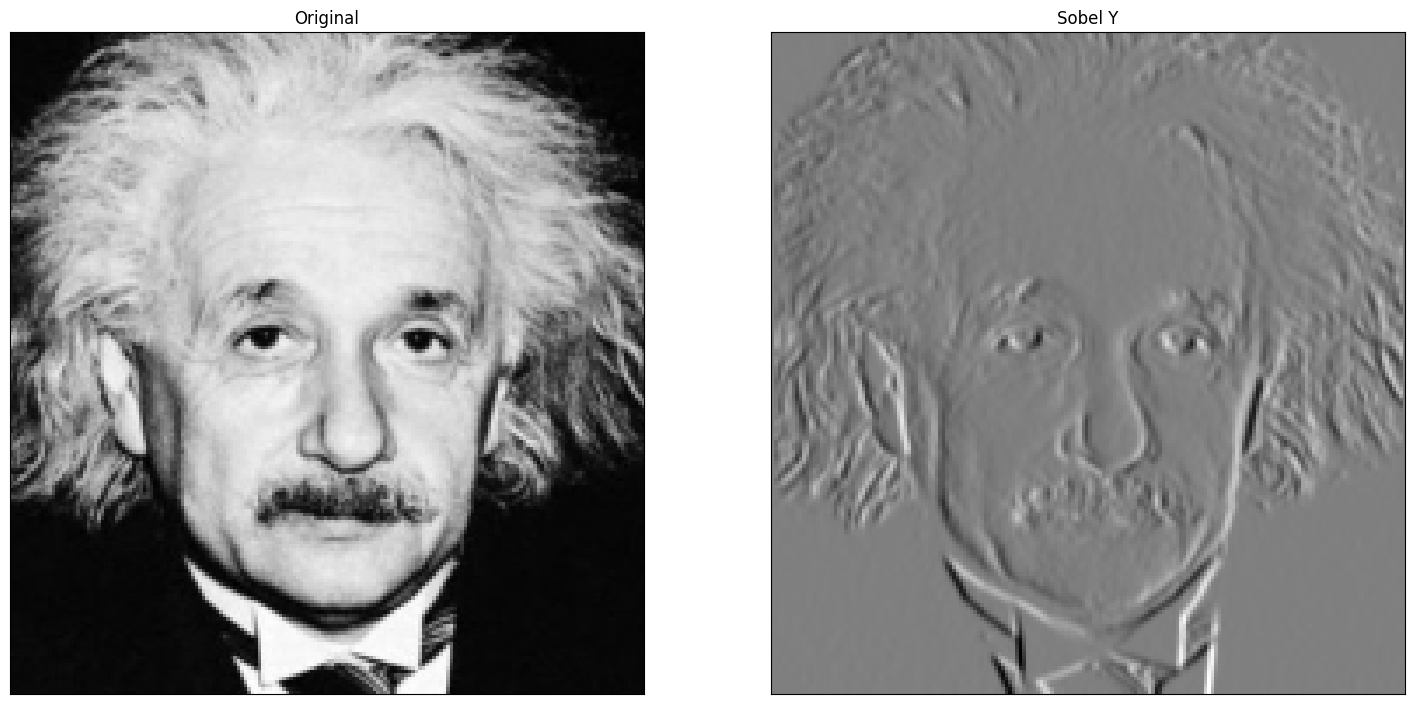

In [58]:
im = cv.imread('a1images/einstein.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None

sobel_hor_y = np.array([[1], [2], [1]])
sobel_hor_x = np.array([[1, 0, -1]])

im1 = cv.filter2D(im, cv.CV_64F, sobel_hor_x)
im2 = cv.filter2D(im1, cv.CV_64F, sobel_hor_y)

fig, ax  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,9))
ax[0].imshow(im, cmap='gray')
ax[0].set_title('Original')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(im2, cmap='gray')
ax[1].set_title('Sobel Y')
ax[1].set_xticks([]), ax[1].set_yticks([])
plt.show()